In [45]:
import pandas as pd
import numpy as np 

from scipy import stats
import math
from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt
import plotly as pl

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/mckayjohns/Viz-Templates/master/data/pizza_tutorial.csv')

In [47]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tackles,Tkls Won,...,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Interceptions,Tkl+Int,Clearances,Errors
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-259,1990,19.7,1.62,0.96,...,1.37,3.45,6.55,2.84,1.02,1.57,1.73,3.35,2.03,0.05
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-225,1997,11.6,0.69,0.34,...,0.43,3.28,1.12,6.12,6.72,0.78,0.17,0.86,1.47,0.00
2,3,Che Adams\Che-Adams,sco SCO,FW,Southampton,24-306,1996,28.1,1.03,0.57,...,0.57,4.70,1.71,5.41,7.12,0.89,0.36,1.39,0.57,0.04
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-233,1997,29.8,1.28,0.77,...,0.54,1.78,3.66,1.64,0.23,1.17,1.68,2.95,7.38,0.03
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-132,1987,3.0,0.00,0.00,...,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.33


In [48]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

In [49]:
df = df.drop(['Rk','Nation','Pos','Squad','Age','Born'],axis=1)

In [50]:
df.head()

,Player,90s,Tackles,Tkls Won,Tkls vs Dribbles,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Interceptions,Tkl+Int,Clearances,Errors
0,Patrick van Aanholt,19.7,1.62,0.96,0.71,1.37,3.45,6.55,2.84,1.02,1.57,1.73,3.35,2.03,0.05
1,Tammy Abraham,11.6,0.69,0.34,0.09,0.43,3.28,1.12,6.12,6.72,0.78,0.17,0.86,1.47,0.00
2,Che Adams,28.1,1.03,0.57,0.21,0.57,4.70,1.71,5.41,7.12,0.89,0.36,1.39,0.57,0.04
3,Tosin Adarabioyo,29.8,1.28,0.77,0.57,0.54,1.78,3.66,1.64,0.23,1.17,1.68,2.95,7.38,0.03
4,Adrián,3.0,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.33


In [51]:
params = list(df.columns)
print(params)
params = params[2:]

['Player', '90s', 'Tackles', 'Tkls Won', 'Tkls vs Dribbles', 'Dribbled Past', 'Successful Pressures', 'Def 3rd Press', 'Mid 3rd Press', 'Att 3rd Press', 'Blocks', 'Interceptions', 'Tkl+Int', 'Clearances', 'Errors']


In [52]:
player = df.loc[df['Player']=='Son Heung-min'].reset_index()
player = list(player.loc[0])
player = player[3:]

In [53]:
player

[0.79, 0.41, 0.38, 1.68, 3.99, 3.42, 9.27, 5.16, 0.98, 0.66, 1.46, 0.13, 0.0]

In [54]:
print(len(params),len(player))

13 13


In [56]:
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [57]:
values

[25, 24, 45, 84, 53, 36, 84, 74, 29, 40, 28, 18, 36]

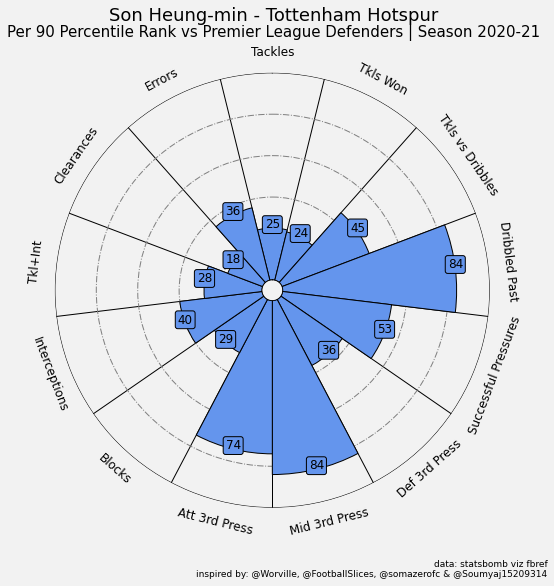

In [59]:
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Son Heung-min - Tottenham Hotspur", size=18,
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Per 90 Percentile Rank vs Premier League Defenders | Season 2020-21",
    size=15,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#000000",
    ha="right"
)

plt.show()